# Regression Exercise 2
In this exercise you will explore two ways of dealing with overfitting --- the first, model selection (one that you have explored before), and the second, regularization.
For this we will use synthetic data and try to fit a polynomial to this data using regression.

## Creating the Data
Run the following code to create the data. This creates a synthetic dataset by adding some random Gaussian noise to a sinusoidal function. Note we used a specific seed so that the generated data would be identical in all runs.

Note: in this exercise you should **use the test set as a validation set**, as we will not care about reporting an approximation for the generalization error of our model.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = [7, 6]
plt.rcParams['font.size'] = 12

In [2]:
def f(x):
    return x * np.sin(x)

def plot_fit(ax, X_train=None, y_train=None, model=None, label=None):
    min_x, max_x = np.floor(min(X_train)), np.ceil(max(X_train))
    x_range = np.linspace(min_x, max_x, 100)
    y = f(x_range)
    min_y, max_y = np.floor(min(y))-5, np.ceil(max(y))+5
    ax.plot(x_range, y, color='gray')
    if X_train is not None and y_train is not None:
        ax.scatter(X_train, y_train, s=30)
    if model is not None:
        ax.plot(x_range, model.predict(x_range), color='red', label=label)
        ax.legend(loc='upper right')
    ax.set_ylim((min_y, max_y))
    ax.set_xlim((min_x, max_x))
    ax.set_ylabel('y')
    ax.set_xlabel('x')

def create_data(n_samples = 60, test_size=0.3, min_x=0, max_x=10, err_scale=1):
    np.random.seed(9)
    X = np.random.uniform(min_x, max_x, size=n_samples)[:, np.newaxis]
    S = np.random.normal(loc=0, scale=err_scale, size=n_samples)[:, np.newaxis] # loc is mean, and scale is std
    y = f(X) + S
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

# generate data
X_train, X_test, y_train, y_test = create_data()

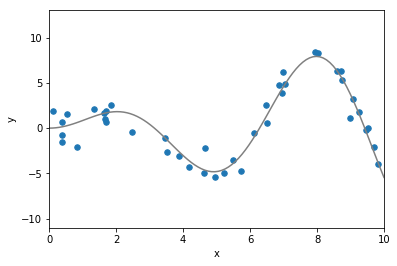

In [3]:
plot_fit(plt.gca(), X_train, y_train)

## Polynomial Regression - Model Selection

**Questions:**
1. Apply polynomial regression to the data, using polynomials with maximal degree of 0 to 11.  Plot the fitted polynomial against the training data and the underlying generating function (that is, for each fitted polynomial, plot that polynomial on top of a graph similar to the one plotted above). **Hint:** Use *sklearn.preprocessing.PolynomialFeatures* and *sklearn.linear_model.LinearRegression*.
2. Do you see underfitting or overfitting? Which is the best degree for this model?
3. Apply model selection technique by choosing the polynomial degree hyperparameter that gives minimum mean squared error on the test data. Explain your results. **Hint:** Use *sklearn.metrics.mean_squared_error*.

### Polynomial Regression

In [4]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

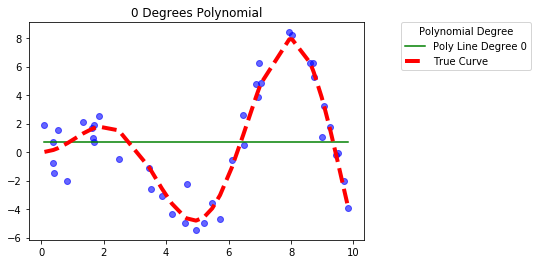

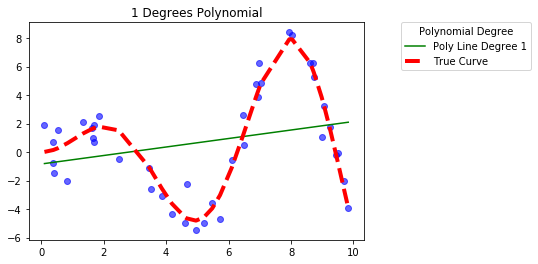

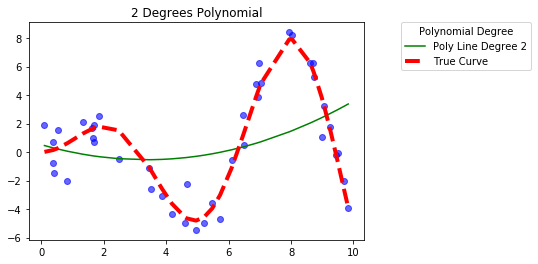

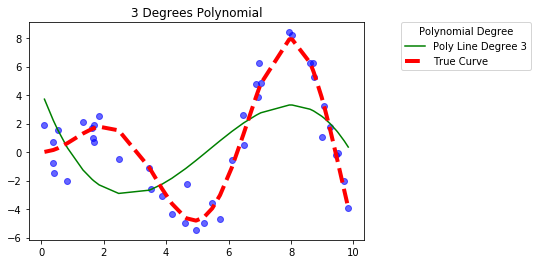

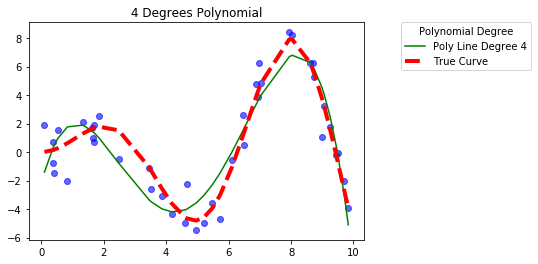

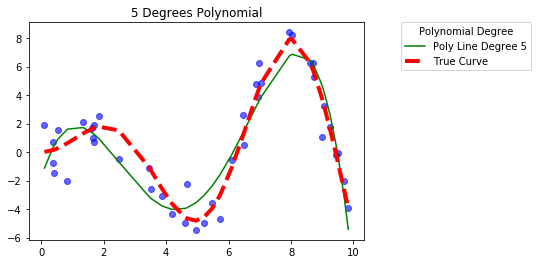

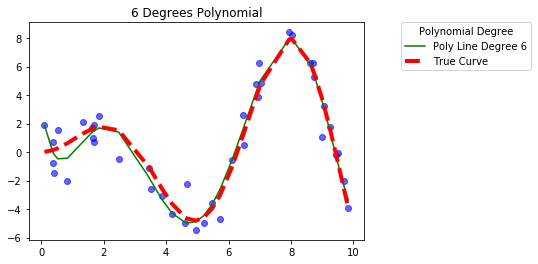

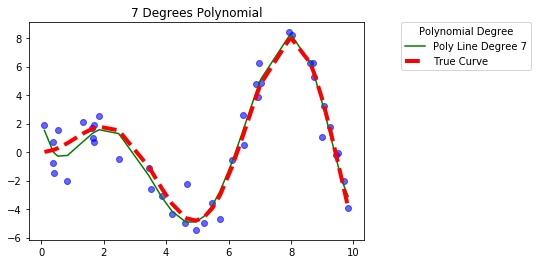

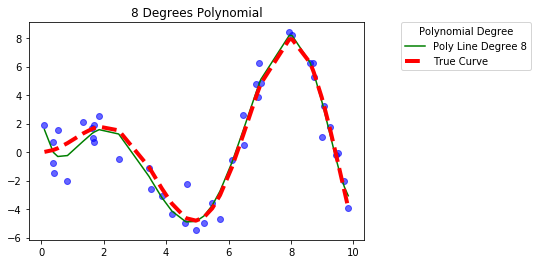

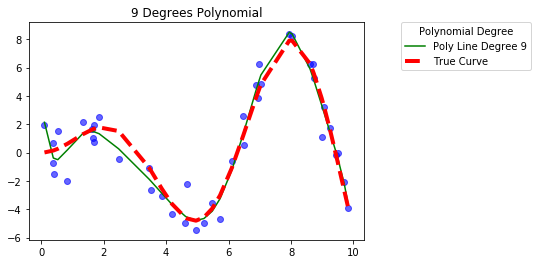

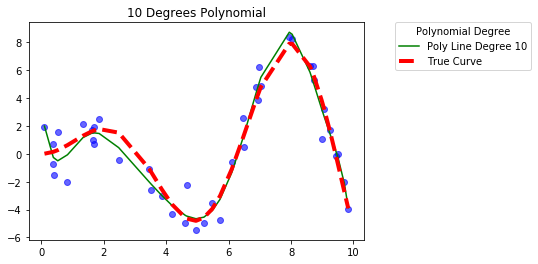

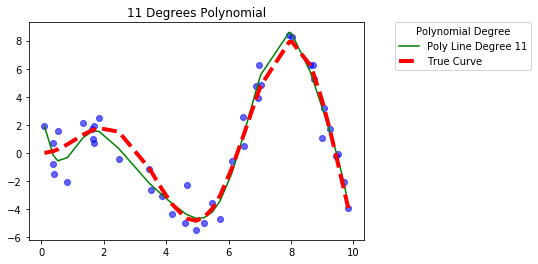

In [5]:
met_df = pd.DataFrame(index=range(0, 12, 1), columns=['Train_RMSE', 'Test_RMSE'])
deg_result = {"Predictions": [], "Train": []}
for deg in range(0, 12, 1):

    # 1 - Fit Polynomial trasnformation to the data (X_train/X_test)
    poly = PolynomialFeatures(deg)
    X_poly = poly.fit_transform(X_train)

    # 2 - Fit LinearRegression model to X_train, y_train
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_train)
    
    # 3 - Predict for X_train and X_test
    y_pred_train = lin_reg.predict(X_poly)
    y_pred_test = lin_reg.predict(poly.transform(X_test))
    
    # 4 - Evaluating
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    met_df['Train_RMSE'].iloc[deg] = train_rmse
    met_df['Test_RMSE'].iloc[deg] = test_rmse
    
    # 5 - Sort X_train and y_pred values
    sort_idx = X_train.flatten().argsort()
    y_pred_train = y_pred_train[sort_idx]
    deg_result["Predictions"].append((f"Deg {deg}" ,y_pred_train))
    deg_result["Train"].append(X_train[sort_idx])
    
    # 6 - Plot the results
    plt.scatter(X_train, y_train, color='blue', alpha=0.6)
    plt.plot(X_train[sort_idx], y_pred_train,  color='green', label=f"Poly Line Degree {deg}")
    plt.plot(X_train[sort_idx], f(X_train[sort_idx]), color='red', 
             linestyle='--', linewidth=4, label="True Curve")
    plt.title(f"{deg} Degrees Polynomial")
    plt.legend(bbox_to_anchor=(1.5, 1), title="Polynomial Degree", 
               frameon=True, borderaxespad=0)
    
    plt.show()

As given above, the underlaying generating function is $x*sin(x)$, meaning the data is for sure non-linear, and has at least three polynomial degrees.<br>
The plots above supports this assumption as we the extremely high bias model (**Underfitting**) with polynomial degree 0, 1, 2 and 3.<br>
It seems like degrees 4 to 7 performs pretty good in terms of fitting the data.<br>
Higher polynomial degrees will probably cause the model (**Overfitting**) the data (high variance).<br>


We'll verify that shortly

**Checking Against The Test Data**

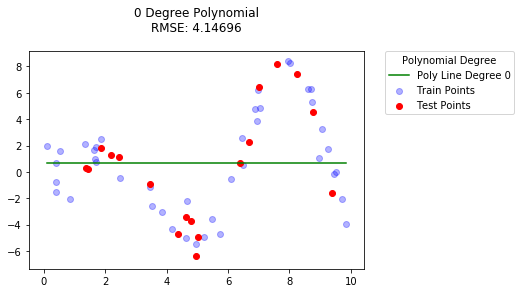

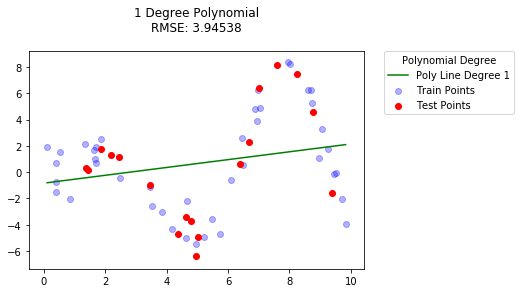

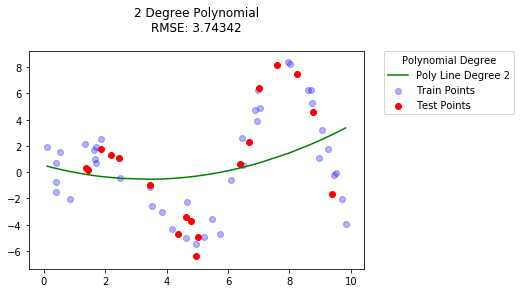

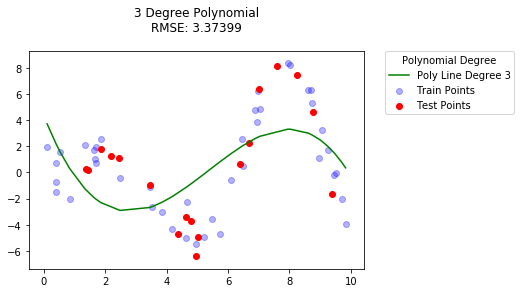

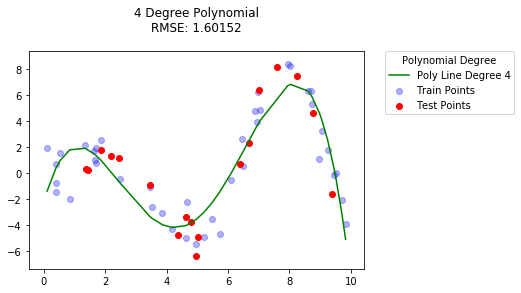

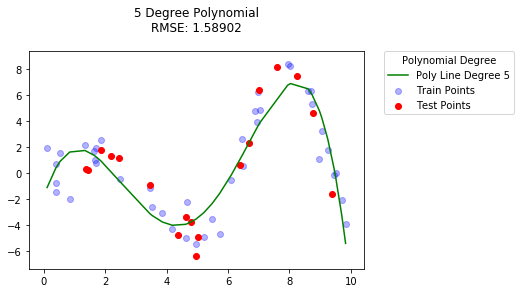

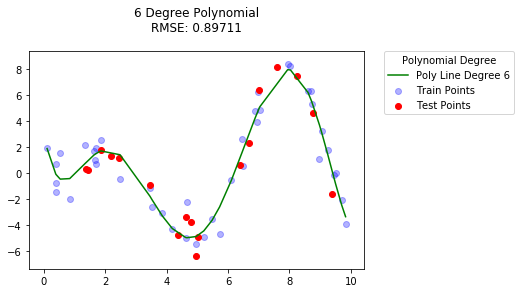

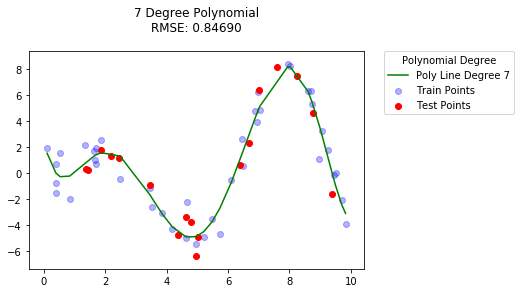

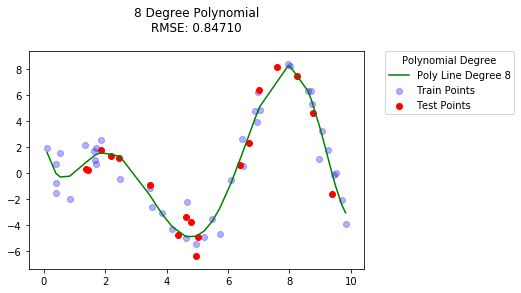

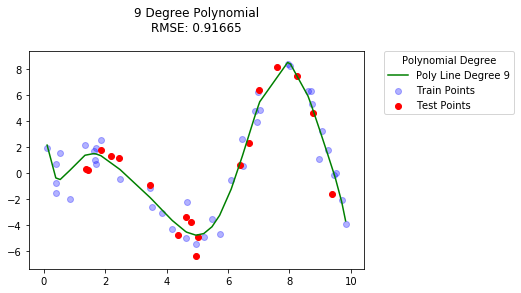

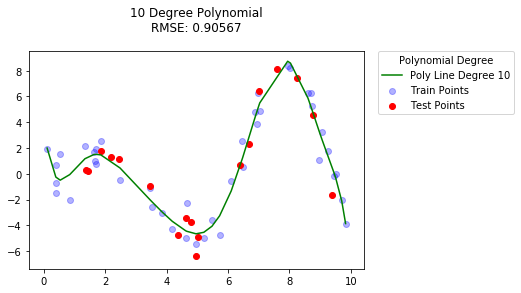

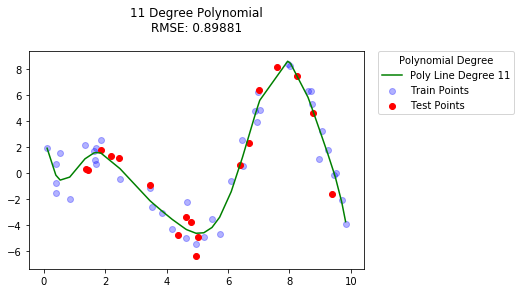

In [13]:
for deg in range(0, 12, 1):
    poly = PolynomialFeatures(deg)
    lin_reg = LinearRegression()
    lin_reg.fit(poly.fit_transform(X_train), y_train)
    
    train_set = deg_result['Train'][deg]
    pred = deg_result['Predictions'][deg][1]
    
    rmse = met_df.loc[deg, 'Test_RMSE']
    plt.plot(train_set, pred, color='green', label=f"Poly Line Degree {deg}")
    plt.scatter(X_train, y_train, color='b', label="Train Points", alpha=0.3)
    plt.title(f"{deg} Degree Polynomial\nRMSE: {rmse:.5f}", pad=20)
    plt.scatter(X_test, y_test, color='red', alpha=1, label="Test Points")
    plt.legend(bbox_to_anchor=(1.45, 1), title="Polynomial Degree", 
               frameon=True, borderaxespad=0)
    
    plt.show()

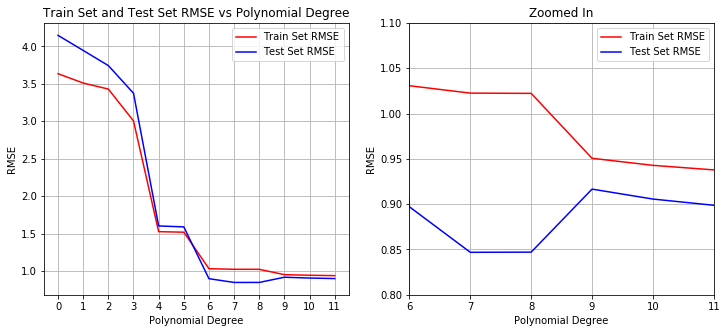

In [14]:
plt.rcParams['axes.grid'] = True
fix, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(met_df.index, met_df['Train_RMSE'], label="Train Set RMSE", color='red')
axs[0].plot(met_df.index, met_df['Test_RMSE'], label="Test Set RMSE", color='b')
axs[0].set(title="Train Set and Test Set RMSE vs Polynomial Degree", xticks=range(0, 12), 
           ylabel="RMSE", xlabel="Polynomial Degree")
axs[0].legend()

# Zoom In
axs[1].plot(met_df.index, met_df['Train_RMSE'], label="Train Set RMSE", color='red')
axs[1].plot(met_df.index, met_df['Test_RMSE'], label="Test Set RMSE", color='b')
axs[1].set(title="Zoomed In", xlim=(6, 11), ylim=(0.8, 1.1), ylabel="RMSE", xlabel="Polynomial Degree")
axs[1].legend()

plt.show()

From the plots above we can see that the error on the `training set` keep decreasing as long as the polynomial degree arises, and at some polynomial degree the error on the `test set` increased.<br>
This behavior implies on *Overfitting*. Hence, I'd say that a good choice of model will be with polynomial degree `7` 

In [15]:
met_df.sort_values(by='Test_RMSE')

,Train_RMSE,Test_RMSE
7,1.02261,0.846904
8,1.02232,0.847099
6,1.03076,0.897106
11,0.937857,0.898812
10,0.94289,0.905668
9,0.950665,0.916646
5,1.51805,1.58902
4,1.52485,1.60152
3,3.00454,3.37399
2,3.42959,3.74342


## Polynomial Regression - Regularization
Now, instead of choosing the best maximal degree to use, we will use polynomial regression with regularization. 

**Questions:**
4. Apply polynomial ridge regression with polynomial degree 11, using different regularization parameters (also test the case where the regularization parameter equals 0). For this task you should use L2-norm regularization (ridge regression), which uses the sum of squared parameters as the regularization term (as we saw in class). That is, 
$$
L(\boldsymbol\theta) = \frac{1}{n}\sum_{i=0}^n (y_i – \boldsymbol\theta^T \mathbf{x}_i)^2 + \alpha \|\boldsymbol\theta\|_2
$$
where $\alpha$ is the regularization parameter, $\boldsymbol\theta$ is the vector of coefficients including the intercept term and $\mathbf{x}_i$ is the vector of the predictors of the i-th data point including a constant predictor for the intercept. **Hint:** Use *sklearn.linear_model.Ridge* with parameter *alpha=...*. Try using alpha values between 0 and 1000.

>Again, plot the fitted polynomial against the training data and the underlying generating function. This time, also plot the coefficients of the fitted polynomial. 

5. 5. What is the main difference between regularization and model selection approaches? What would be the best regularization parameter to use in this case? Compare your results with the model selection approach for overcoming the the problem of overfitting.

6. Compare the above results with L1-norm regularization (LASSO) instead of the L2-norm, that is
$$
L(\boldsymbol\theta) = \frac{1}{n}\sum_{i=0}^n (y_i – \boldsymbol\theta^T \mathbf{x}_i)^2 + \alpha \|\boldsymbol\theta\|_1
$$
> **Hint**: Use *sklearn.linear_model.Lasso*.

### Ridge Regularization

In [16]:
from sklearn.linear_model import Ridge

C:\Users\Amit2\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.81063e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\Amit2\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.81063e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\Amit2\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.81063e-24): result may not be accurate.
  overwrite_a=True).T
C:\Users\Amit2\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.14186e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\Amit2\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.81063e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\Amit2\Anaconda3\lib\site-packages\sklearn\linear_mo

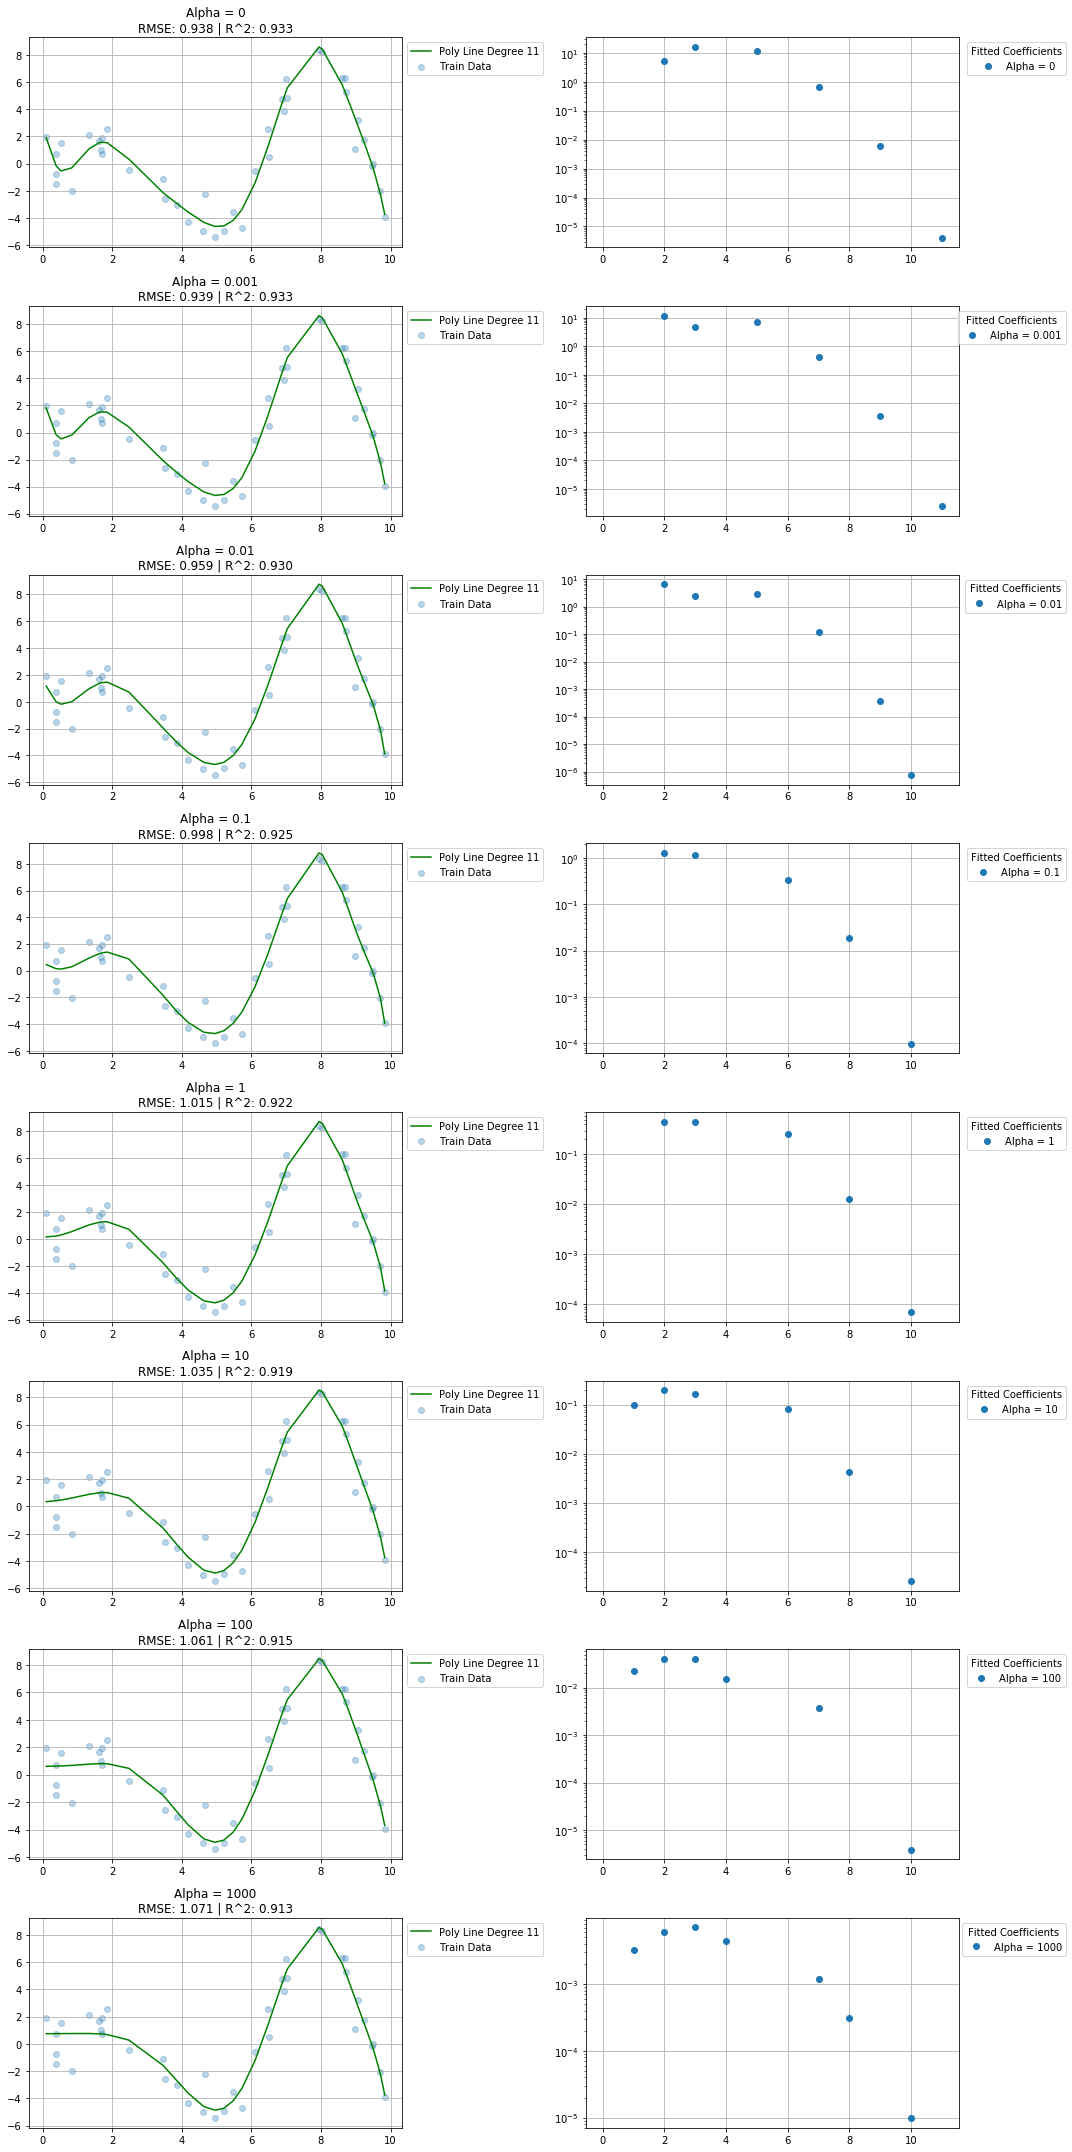

In [186]:
alphas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
met_df_alpha = pd.DataFrame(index=[alpha for alpha in alphas], columns=['Train_RMSE', 
                                                                        'Test_RMSE',
                                                                        'R2_score'])

poly = PolynomialFeatures(11)
X_poly = poly.fit_transform(X_train)

fig, axs = plt.subplots(nrows=len(alphas), ncols=2, figsize=(15, 30))
for i, alpha in enumerate(alphas, start=0):
    lin_reg_ridge = Ridge(alpha=alpha, normalize=False)
    lin_reg_ridge.fit(X_poly, y_train)
    y_pred = lin_reg_ridge.predict(X_poly)
    train_rmse = mean_squared_error(y_train, y_pred, squared=False)
    test_rmse = mean_squared_error(y_test, lin_reg_ridge.predict(poly.transform(X_test)))
    r2 = r2_score(y_train, y_pred)
    met_df_alpha.loc[alpha] = train_rmse, test_rmse, r2
    
    axs[i][0].scatter(X_train, y_train, label="Train Data", alpha=0.3)
    sort_idx = X_train.flatten().argsort()
    y_pred = y_pred[sort_idx]
    axs[i][0].plot(X_train[sort_idx], y_pred,  color='green', label=f"Poly Line Degree {deg}")
    axs[i][0].set_title(f"Alpha = {alpha}\nRMSE: {train_rmse:.3f} | R^2: {r2:.3f}")
    axs[i][0].legend(bbox_to_anchor=(1, 1))
    
    axs[i][1].plot(np.arange(0, len(lin_reg_ridge.coef_.T), 1).reshape(-1, 1), lin_reg_ridge.coef_.T, 
                   marker="o", linestyle="none", label=f"Alpha = {alpha}")
    axs[i][1].set_yscale("log")
    axs[i][1].legend(title="Fitted Coefficients", bbox_to_anchor=(1.3, 1))

    plt.tight_layout()
#     plt.show()

In [230]:
met_df_alpha.sort_values(by='R2_score')

,Train_RMSE,Test_RMSE,R2_score
1000.000,1.07134,0.774218,0.913122
100.000,1.06063,0.728661,0.914851
10.000,1.03494,0.720474,0.918926
1.000,1.01529,0.758172,0.921975
0.100,0.99774,0.757859,0.924649
0.010,0.958828,0.763973,0.930412
0.001,0.939042,0.801542,0.933255
0.000,0.937857,0.80786,0.933423


**Regularization penalizes high coefficients values and in that prevents *Overfitting*, whereas Model Selection approach focuses on finding the model's best hyper-parameters which will hopefully won't overfit the data**

At the example above we used Eleven degree polynomial by fitting Ridge regularization with different values of the regularization parameter ($\alpha$) -  At the plot below we'll try to get sense of how low values of alpha (i.e, less than 1) affects our model in terms of RMSE

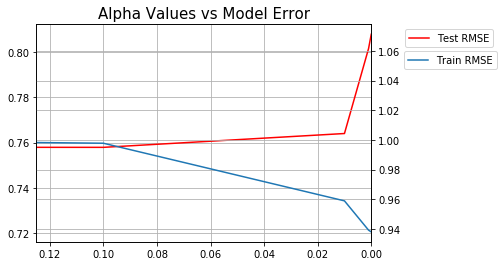

In [231]:
plt.plot(met_df_alpha['Test_RMSE'], color='red', label="Test RMSE")
plt.title("Alpha Values vs Model Error", fontsize=15)
plt.legend(bbox_to_anchor=(1.38, 1))
plt.twinx()
plt.plot(met_df_alpha['Train_RMSE'], label="Train RMSE")
plt.legend(bbox_to_anchor=(1.39, 0.9))
plt.xlim(0.125, 0)
plt.show()

By this graph we can see that alpha value around `0.1` might be a good choice for our model, since it is exactly the point where thee test error starts increasing while the train error decreases monotonically.

### LASSO Regularization

In [233]:
from sklearn.linear_model import Lasso

C:\Users\Amit2\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if sys.path[0] == '':
C:\Users\Amit2\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Amit2\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74.721036686285, tolerance: 0.05548777615632082
  positive)
C:\Users\Amit2\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74.73233717784414, tolerance: 0.05548777615632082
  positive)
C:\Users\Amit2\Anaconda3\lib\site-packages\

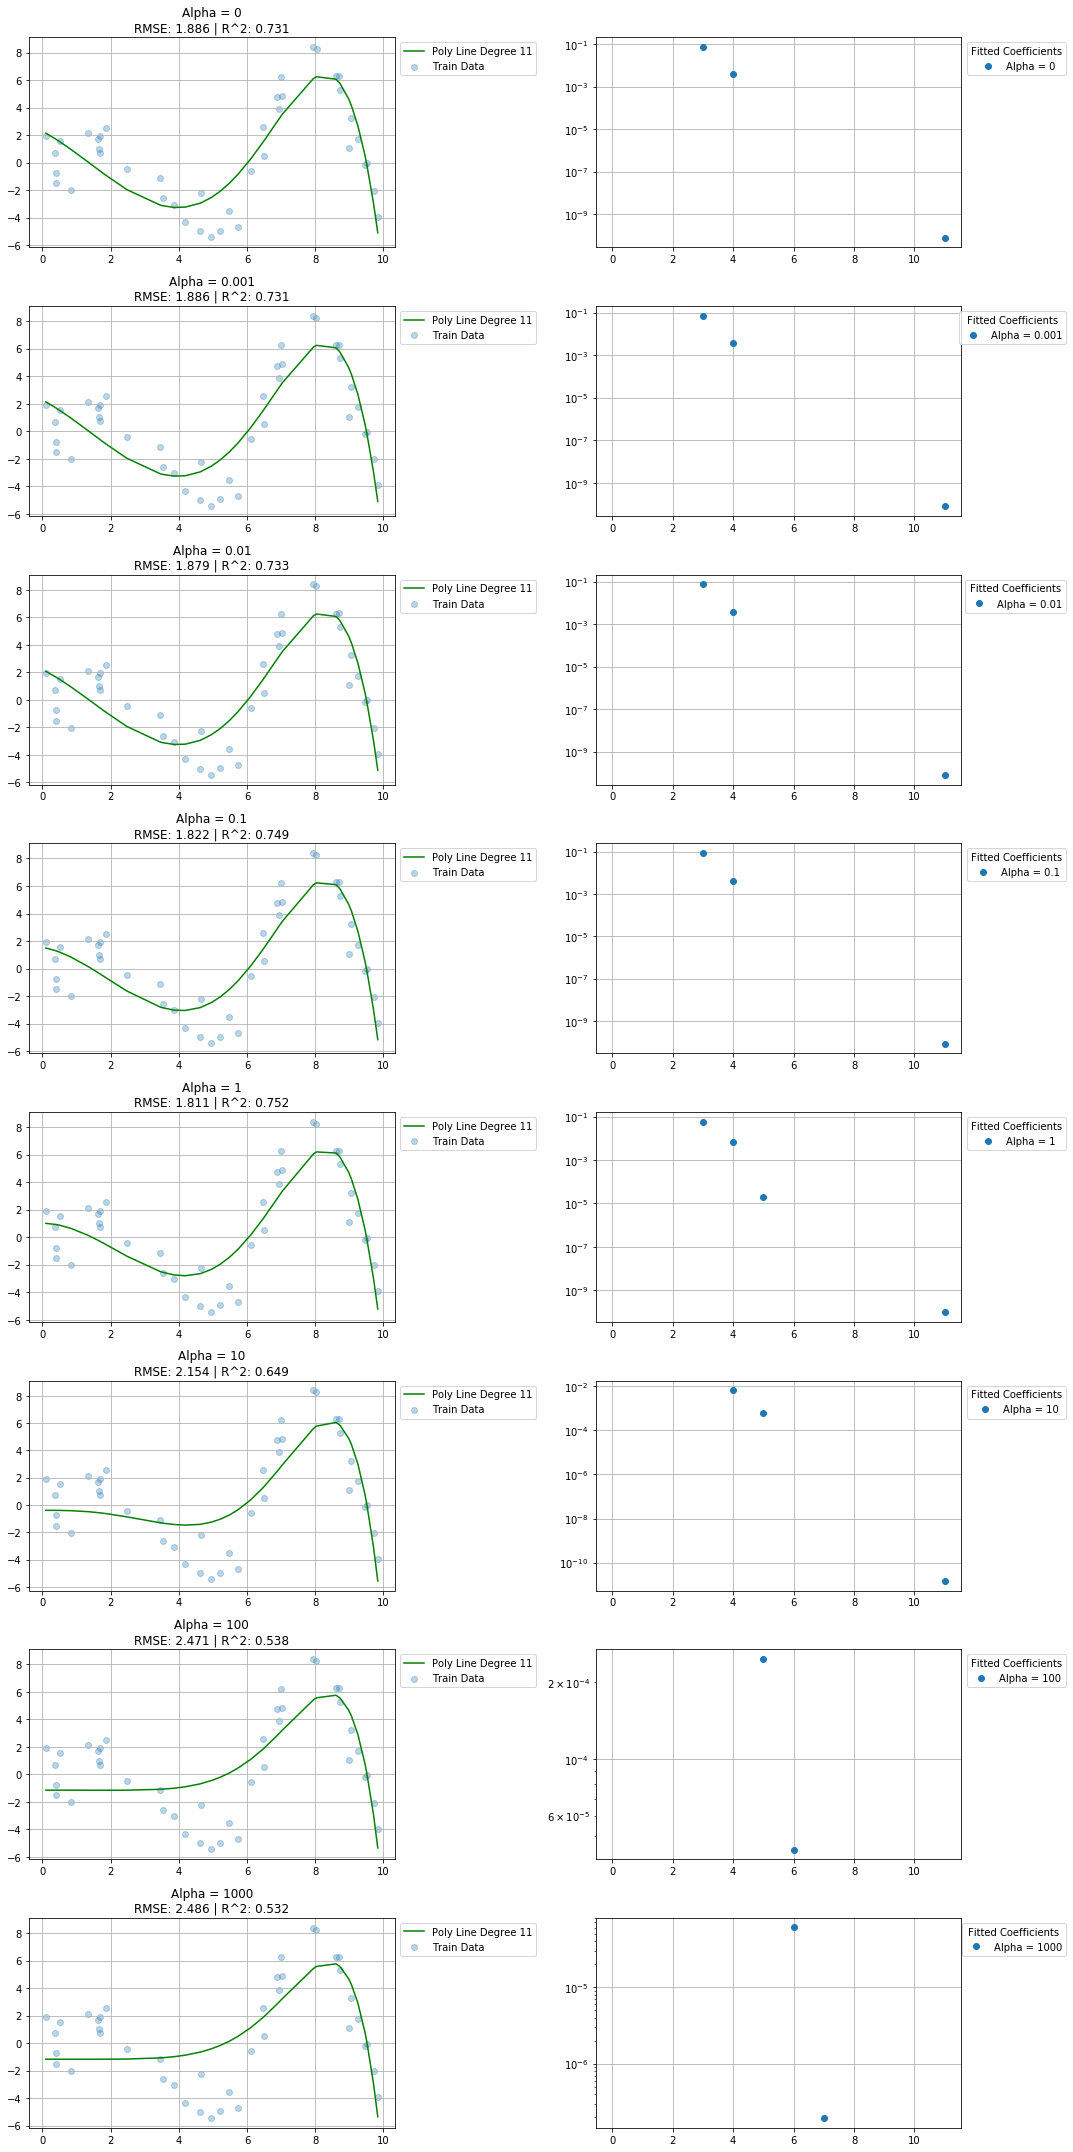

In [234]:
alphas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
met_df_alpha = pd.DataFrame(index=[alpha for alpha in alphas], columns=['Train_RMSE', 
                                                                        'Test_RMSE',
                                                                        'R2_score'])

poly = PolynomialFeatures(11)
X_poly = poly.fit_transform(X_train)

fig, axs = plt.subplots(nrows=len(alphas), ncols=2, figsize=(15, 30))
for i, alpha in enumerate(alphas, start=0):
    lin_reg_ridge = Lasso(alpha=alpha, normalize=False)
    lin_reg_ridge.fit(X_poly, y_train)
    y_pred = lin_reg_ridge.predict(X_poly)
    train_rmse = mean_squared_error(y_train, y_pred, squared=False)
    test_rmse = mean_squared_error(y_test, lin_reg_ridge.predict(poly.transform(X_test)))
    r2 = r2_score(y_train, y_pred)
    met_df_alpha.loc[alpha] = train_rmse, test_rmse, r2
    
    axs[i][0].scatter(X_train, y_train, label="Train Data", alpha=0.3)
    sort_idx = X_train.flatten().argsort()
    y_pred = y_pred[sort_idx]
    axs[i][0].plot(X_train[sort_idx], y_pred,  color='green', label=f"Poly Line Degree {deg}")
    axs[i][0].set_title(f"Alpha = {alpha}\nRMSE: {train_rmse:.3f} | R^2: {r2:.3f}")
    axs[i][0].legend(bbox_to_anchor=(1, 1))
    
    axs[i][1].plot(np.arange(0, len(lin_reg_ridge.coef_.T), 1).reshape(-1, 1), lin_reg_ridge.coef_.T, 
                   marker="o", linestyle="none", label=f"Alpha = {alpha}")
    axs[i][1].set_yscale("log")
    axs[i][1].legend(title="Fitted Coefficients", bbox_to_anchor=(1.3, 1))

    plt.tight_layout()

While Ridge regularization penalizes high coefficients by reducing its values, LASSO penalizes high coefficients by setting these coefficients to 0 (i.e eliminate them).<br>
At this particular example, it can be seen that Ridge performs better than LASSO, both in terms of RMSE and $R^2\space Score$

In [236]:
met_df_alpha.sort_values("R2_score")

,Train_RMSE,Test_RMSE,R2_score
1000.000,2.48616,8.33913,0.532146
100.000,2.47141,8.24829,0.537682
10.000,2.15365,6.2738,0.648922
0.000,1.8863,4.46775,0.730676
0.001,1.88551,4.46526,0.730902
0.010,1.87855,4.44339,0.732885
0.100,1.82217,4.26741,0.748677
1.000,1.81077,4.28906,0.751813
